In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import KFold


In [35]:
heart = pd.read_csv('dataset/cardio_train_kaggle.csv', delimiter=';')
#heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [36]:
dataset = heart

In [37]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)


In [38]:
dataset = dataset.drop('id', axis=1)
dataset["age"] = round(dataset["age"] / 365)
dataset

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      50.0       2     168    62.0    110     80            1     1      0   
1      55.0       1     156    85.0    140     90            3     1      0   
2      52.0       1     165    64.0    130     70            3     1      0   
3      48.0       2     169    82.0    150    100            1     1      0   
4      48.0       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  53.0       2     168    76.0    120     80            1     1      1   
69996  62.0       1     158   126.0    140     90            2     2      0   
69997  52.0       2     183   105.0    180     90            3     1      0   
69998  61.0       1     163    72.0    135     80            1     2      0   
69999  56.0       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
69995     0       1       0  
69996     0       1       1  
69997     1       0       1  
69998     0       0       1  
69999     0       1       0  

[70000 rows x 12 columns]

In [39]:
#dataset

In [40]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values


#RFE 11 features
#X = dataset[['age', 'caa', 'chol', 'cp', 'thall', 'oldpeak','slp','thalachh','exng', 'trtbps','sex']] #11
#X = dataset[['age', 'caa', 'chol', 'cp', 'thall', 'oldpeak','slp','thalachh', 'trtbps']] #9 

#SelectFromModel
#X = dataset[['cp', 'thalachh','oldpeak','caa','thall','age','chol']]

#permutations
#X = dataset[['thall', 'exng','sex','slp','thalachh','oldpeak','caa','cp','age']]
#X = dataset[['sex','thall','caa','oldpeak','restecg','thalachh','exng','slp']]


#Boruta
#X = dataset [['age','cp','thalachh','exng','oldpeak','slp','caa','thall']]

#Feature Importance
#X = dataset[['cp', 'thalachh','oldpeak','caa','thall','age','chol']]


In [41]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [42]:
dataset.iloc[:, -1].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [43]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            
            t0= time.time()
            if (param == 0):
                model = LogisticRegression()
                
            else:
                model = LogisticRegression(C=param['C'], penalty = param['penalty'])

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



## Grid Search

In [12]:
dict_LG= {}

## First Model without preprocessing

In [32]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

#from collections import defaultdict
scaled_features = standardise(X)


param = 0
X=scaled_features
result = calculate_model(param,X,y)
    
dict_LG['LG'] = result
dict_LG


{'LG': [72.13285714285713,
  72.32000458300543,
  74.30863922151758,
  72.13285714285713,
  72.07559987450371,
  78.44175308290966,
  0.06593214988708497]}

In [44]:
dict_LG['LG']= [72.13285714285713,
  72.32000458300543,
  74.30863922151758,
  72.13285714285713,
  72.07559987450371,
  78.44175308290966,
  0.06593214988708497]

## K-means

In [45]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)


model = KMeans()
#visualizer = KElbow

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(scaled_features)

In [47]:
y= kmeans.predict(scaled_features)

In [48]:
df = pd.DataFrame(scaled_features , columns= ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
#df['Cluster'] = y
df.head()

age    gender    height    weight     ap_hi     ap_lo  cholesterol  \
0 -0.493505  1.364055  0.443452 -0.847873 -0.122182 -0.088238    -0.539322   
1  0.245566 -0.733108 -1.018168  0.749831  0.072610 -0.035180     2.400793   
2 -0.197877 -0.733108  0.078047 -0.708942  0.007679 -0.141297     2.400793   
3 -0.789134  1.364055  0.565254  0.541435  0.137541  0.017879    -0.539322   
4 -0.789134 -0.733108 -1.018168 -1.264666 -0.187113 -0.194356    -0.539322   

      gluc     smoke      alco    active  
0 -0.39572 -0.310879 -0.238384  0.494167  
1 -0.39572 -0.310879 -0.238384  0.494167  
2 -0.39572 -0.310879 -0.238384 -2.023607  
3 -0.39572 -0.310879 -0.238384  0.494167  
4 -0.39572 -0.310879 -0.238384 -2.023607

In [49]:


param =0
#print(param)
X= scaled_features
result = calculate_model(param,X,y)
result
dict_LG['kmeans'] = result
dict_LG

{'LG': [72.13285714285713,
  72.32000458300543,
  74.30863922151758,
  72.13285714285713,
  72.07559987450371,
  78.44175308290966,
  0.06593214988708497],
 'kmeans': [99.92485714285712,
  99.92492757698284,
  99.96991931656727,
  99.92485714285712,
  99.92486744386252,
  99.99944345906094,
  0.08010983943939211],
 'kmeans+Shap': [99.17619047619047,
  99.17654628623661,
  99.37726292155963,
  99.17619047619047,
  99.17623737055872,
  99.91838218399117,
  0.2758708922068278]}

In [19]:
import shap


In [20]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[09:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|===================| 69778/70000 [02:55<00:00]        

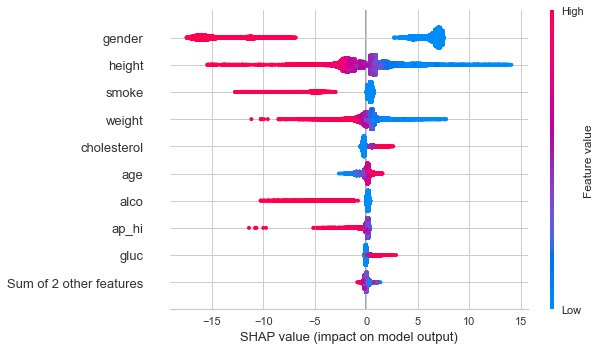

In [21]:
shap.plots.beeswarm(shap_values)

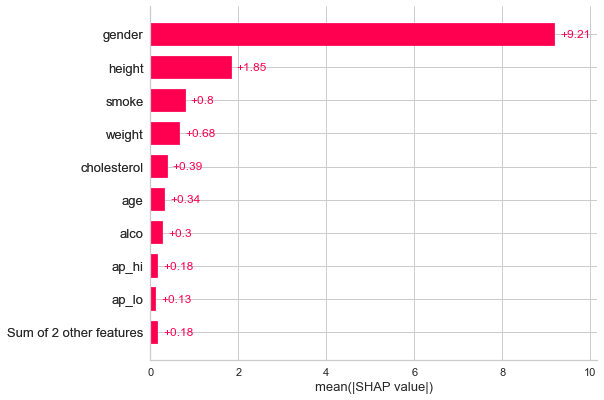

In [22]:
shap.plots.bar(shap_values)

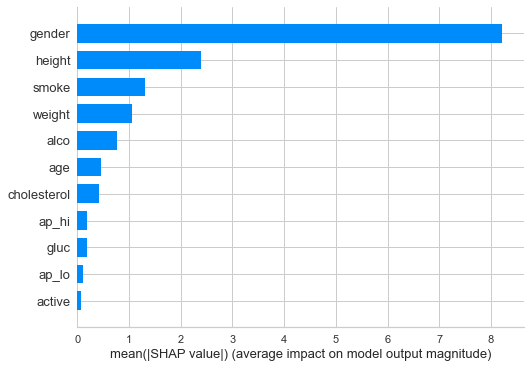

In [22]:
shap_values = shap.TreeExplainer(model).shap_values(df)
shap.summary_plot(shap_values, df, plot_type="bar")

In [50]:


X = dataset[['gender','height','smoke','weight','alco','age']].values


param =0
#print(param)


result = calculate_model(param,X,y)
dict_LG['kmeans+Shap'] = result


In [51]:
dict_LG

{'LG': [72.13285714285713,
  72.32000458300543,
  74.30863922151758,
  72.13285714285713,
  72.07559987450371,
  78.44175308290966,
  0.06593214988708497],
 'kmeans': [99.92485714285712,
  99.92492757698284,
  99.96991931656727,
  99.92485714285712,
  99.92486744386252,
  99.99944345906094,
  0.08010983943939211],
 'kmeans+Shap': [99.5857619047619,
  99.58686178921448,
  99.7588135333041,
  99.5857619047619,
  99.5859854723327,
  99.97255935862786,
  0.44205588181813554]}

In [52]:

df_dict = pd.DataFrame.from_dict(dict_LG,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG           72.132857  72.320005    74.308639  72.132857  72.075600   
kmeans       99.924857  99.924928    99.969919  99.924857  99.924867   
kmeans+Shap  99.585762  99.586862    99.758814  99.585762  99.585985   

                   Roc  CPU_time  
LG           78.441753  0.065932  
kmeans       99.999443  0.080110  
kmeans+Shap  99.972559  0.442056

In [53]:
# Adding Number of features
df_dict['no_of_features'] = [11,11,6]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
LG           72.132857  72.320005    74.308639  72.132857  72.075600   
kmeans       99.924857  99.924928    99.969919  99.924857  99.924867   
kmeans+Shap  99.585762  99.586862    99.758814  99.585762  99.585985   

                   Roc  CPU_time  no_of_features  
LG           78.441753  0.065932              11  
kmeans       99.999443  0.080110              11  
kmeans+Shap  99.972559  0.442056               6